In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df= df.drop("RowNumber" , axis=1)

In [10]:
df=df.drop(['CustomerId'	,'Surname'],axis=1)

In [16]:
df = pd.get_dummies(df , columns=['Geography','Gender'] , drop_first=True , dtype=int)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
x_train , x_test , y_train  , y_test = train_test_split(df.drop("Exited" , axis=1) , df["Exited"] , test_size = 0.3 , random_state =12 , stratify = df['Exited'])


In [22]:
scale = StandardScaler()

In [29]:
x_train = pd.DataFrame(scale.fit_transform(x_train) , columns=x_train.columns)
x_test = pd.DataFrame(scale.transform(x_test) , columns=x_train.columns)

In [35]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [42]:
x_train.shape

(7000, 11)

In [38]:
model = Sequential()

# one input layer  
# one hidden layer , using 3 perceptrons initially , using activation func as a sigmoid
# one ouput

# 2. Do we need to specify input_dim in the output layer?

# ❌ No.
# Because Keras automatically knows:

# "The previous layer outputs 3 values → so the next layer will accept 3 inputs."

# That’s why in Sequential models, you only give input_dim (or input_shape) to the first layer.

In [39]:
model = Sequential()

# hidden layer: 3 perceptrons, sigmoid, takes "number of features" as input
model.add(Dense(3, activation="sigmoid", input_dim=x_train.shape[1]))

# output layer: 1 perceptron, sigmoid, takes 3 inputs automatically
model.add(Dense(1, activation="sigmoid"))


In [41]:
model.summary()
# parms of layer 1  : no of inputs x no of perceptron in layer + no of perceptron
# = 11 x 3 + 3= 36

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(loss="binary_crossentropy" , optimizer="adam",metrics= ["accuracy"])

In [66]:
history =model.fit(x_train,y_train , epochs = 100,validation_split  = 0.2 )

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8392 - loss: 0.3967 - val_accuracy: 0.8343 - val_loss: 0.3983
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8398 - loss: 0.3908 - val_accuracy: 0.8343 - val_loss: 0.3984
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.3807 - val_accuracy: 0.8343 - val_loss: 0.3983
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8363 - loss: 0.3991 - val_accuracy: 0.8350 - val_loss: 0.3983
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8415 - loss: 0.3998 - val_accuracy: 0.8343 - val_loss: 0.3983
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8415 - loss: 0.3929 - val_accuracy: 0.8357 - val_loss: 0.3983
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8363 - loss: 0.3980 - val_accuracy: 0.8350 - val_loss: 0.3982
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8367 - loss: 0.4004 - val_accu

In [67]:
model.layers[0].get_weights()

[array([[-0.04932024,  0.15792355,  0.13187356],
        [-2.072777  , -4.1532106 ,  0.3745441 ],
        [-0.0692693 , -0.13966632,  0.2439162 ],
        [-0.44308537,  0.17862447, -0.26876467],
        [ 0.2723971 , -0.18496475,  0.12413689],
        [-0.12606032, -0.09691146,  0.23354806],
        [-1.789846  , -0.9253791 ,  1.9927723 ],
        [-0.19435483,  0.45724708, -0.09511323],
        [-0.69325113, -0.03009841, -0.50476575],
        [-0.22761726,  0.12484728, -0.03622892],
        [ 0.5635012 ,  0.06477016,  0.5373092 ]], dtype=float32),
 array([-1.5388232,  0.9220274, -0.7577858], dtype=float32)]

In [68]:
y_log = model.predict(x_test) # not 0 or 1 cz used sigmoid whose val between 0  adn 1y

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [69]:
pred= np.where(y_log>0.5 , 1 , 0)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , pred) # 82%

0.8296666666666667

In [74]:
accuracy_each_epoch = history.history['accuracy']

In [76]:
history.history.keys()
loss_each_epoch = history.history['loss']

In [85]:
history.history.keys()
validatonloss_each_epoch = history.history['val_loss']


In [77]:
import matplotlib.pyplot  as plt

Text(0.5, 1.0, 'loss in neural  networks')

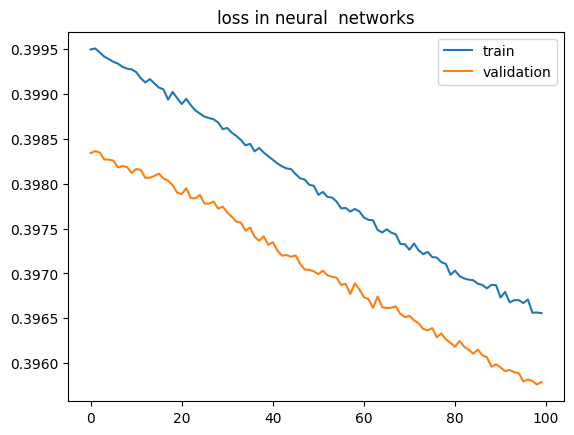

In [87]:
plt.plot(loss_each_epoch, label="train")
plt.plot(validatonloss_each_epoch,label="validation")
plt.legend()
plt.title("loss in neural  networks")

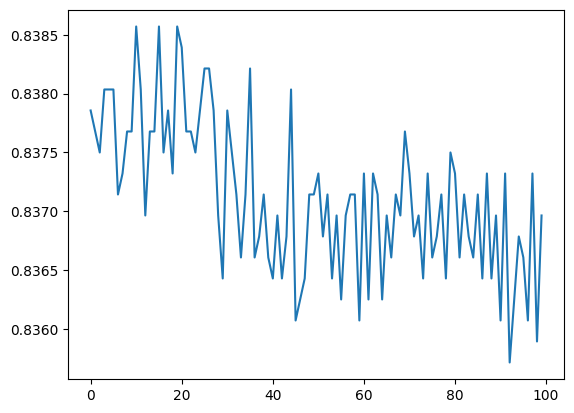

In [82]:
plt.plot(accuracy_each_epoch)
